# Testing out the FRED API

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pylab as plt
import plotly.express as px

plt.style.use("seaborn-whitegrid")

pd.set_option("max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Setup the FRED api object

In [3]:
apifile = open("fred.api", "r")
fred = Fred(api_key=apifile.read())
apifile.close()

# Load in Some Data

https://fred.stlouisfed.org/series/WEI

In [4]:
wei = fred.get_series("WEI")
sp = fred.get_series("SP500")

<AxesSubplot:title={'center':'WEI'}>

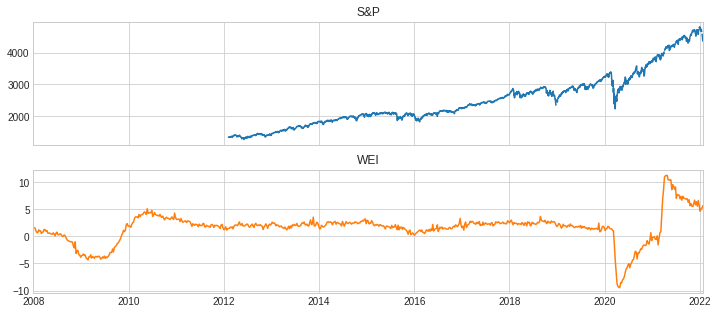

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)
sp.plot(figsize=(12, 5), ax=axs[0], title="S&P", color=color_pal[0])
wei.plot(figsize=(12, 5), ax=axs[1], title="WEI", color=color_pal[1])

# ALFred Data (with Revisions)

In [6]:
gdp_first = fred.get_series_first_release("GDP")
gdp_latest = fred.get_series_latest_release("GDP")
gdpa_latest = fred.get_series_latest_release("GDPA")

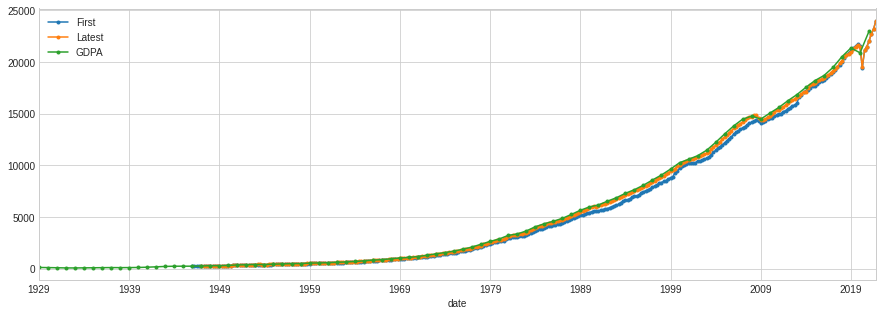

In [7]:
gdp_first.plot(figsize=(15, 5), label="First", style=".-")
gdp_latest.plot(label="Latest", style=".-")
gdpa_latest.plot(label="GDPA", style=".-")
plt.legend()

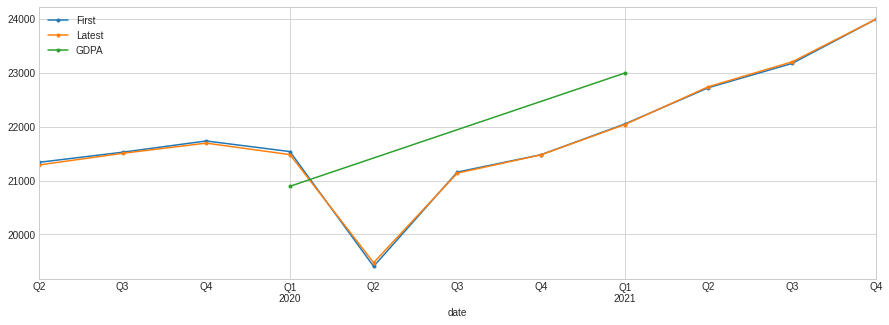

In [8]:
gdp_first.loc[gdp_first.index > "2019-01-01"].plot(
    figsize=(15, 5), label="First", style=".-"
)
gdp_latest.loc[gdp_latest.index > "2019-01-01"].plot(
    figsize=(15, 5), label="Latest", style=".-"
)
gdpa_latest.loc[gdpa_latest.index > "2019-01-01"].plot(
    figsize=(15, 5), label="GDPA", style=".-"
)
plt.legend()

# Search Popular things on Fred

In [9]:
popular = fred.search_by_category(
    101, limit=10, order_by="popularity", sort_order="desc"
)

## Plot the Top 10 Extange Rates

In [5]:
exchange_rates = fred.search_by_category(
    94, limit=10, order_by="popularity", sort_order="desc"
)

ex_rates = {}

for i, d in exchange_rates.iterrows():
    if d["id"] in ex_rates:
        # So we don't keep querying the api
        continue
    ex_rates[d["id"]] = fred.get_series(d["id"])
    
ex_rates_df = pd.DataFrame(ex_rates)
col_mapping = (
    exchange_rates.set_index("id")["title"]
    .str.replace(".", "", regex=False)
    .str.lower()
    .str.replace(" ", "_", regex=False)
    .to_dict()
)
ex_rates_df.columns = [col_mapping[c] for c in ex_rates_df.columns]
ex_rates_df_ = ex_rates_df.loc[ex_rates_df.index >= "2010-01-01"]
ex_rates_df_std = ex_rates_df_ / ex_rates_df_.max(axis=0)

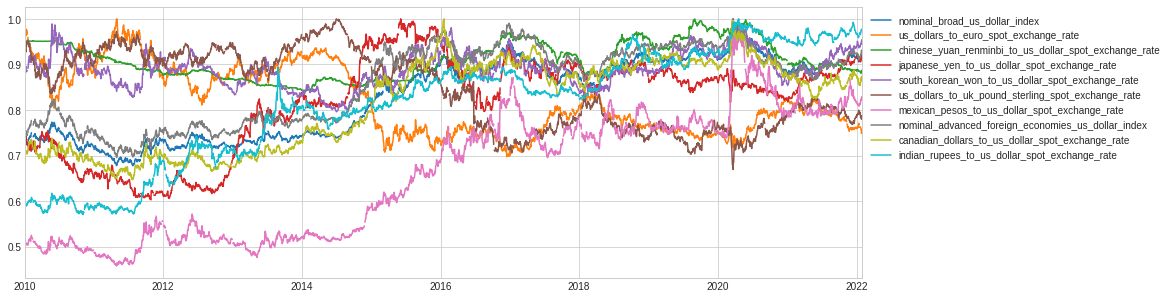

In [11]:
ex_rates_df_std.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

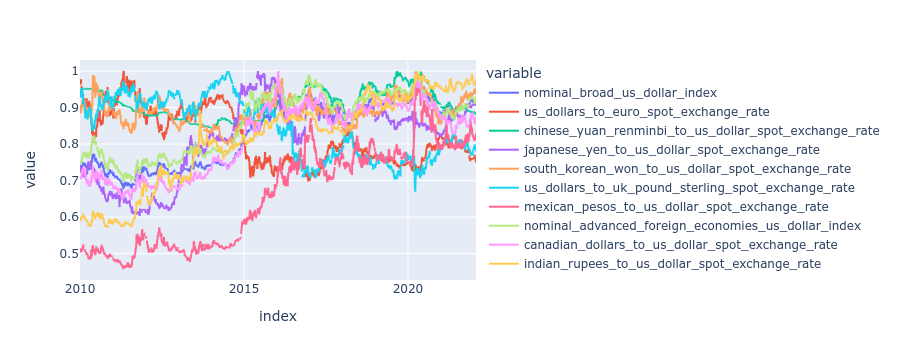

In [12]:
px.line(ex_rates_df_std)

# Zillow Home Index
- Don't forget to check out North Dakota for Bogoodski!!!

In [13]:
zillow_search = fred.search("zillow")

In [60]:
zillow_search["state"] = zillow_search["title"].str.replace(
    "Zillow Home Value Index (ZHVI) for All Homes Including Single-Family Residences, Condos, and CO-OPs in ",
    "",
    regex=False,
)
zillow_search.loc[zillow_search["state"].str.len() > 25, "state"] = "not_state"
zillow_search["popularity"] = zillow_search["popularity"].astype("int")

In [66]:
state_ids = zillow_search.query('state != "not_state"')["id"].unique()

In [68]:
res = {}
for state in state_ids:
    res[state] = fred.get_series(state)

In [70]:
zstate = pd.DataFrame(res)
id_to_state = (
    zillow_search.query('state != "not_state"').set_index("id")["state"].to_dict()
)
zstate.columns = [id_to_state[s] for s in zstate.columns]

In [89]:
top5 = zstate.max().sort_values(ascending=False).index[:5]

In [92]:
zstate.tail(5)

Montana  California  New York   Florida   Arizona     Texas  \
2021-08-01  378878.0    707440.0  361970.0  312514.0  374964.0  259251.0   
2021-09-01  387515.0    717304.0  365981.0  320454.0  382610.0  264039.0   
2021-10-01  394994.0    722316.0  369017.0  327878.0  389805.0  268254.0   
2021-11-01  400864.0    727808.0  371882.0  335231.0  395716.0  271841.0   
2021-12-01  408841.0    734612.0  374717.0  342077.0  401355.0  276048.0   

              Hawaii    Alaska  the District of Columbia    Nevada  \
2021-08-01  767656.0  308574.0                  689786.0  386324.0   
2021-09-01  782918.0  309857.0                  689916.0  394159.0   
2021-10-01  797193.0  311042.0                  692178.0  401287.0   
2021-11-01  810758.0  309927.0                  692702.0  408510.0   
2021-12-01  821263.0  311083.0                  693594.0  415077.0   

            Washington  South Carolina   Georgia  Massachusetts  Illinois  \
2021-08-01    539320.0        237296.0  259152.0       527390.0  237274.0   
2021-09-01    547258.0        242160.0  264444.0       532369.0  239797.0   
2021-10-01    555001.0        247159.0  269863.0       536639.0  242021.0   
2021-11-01    563743.0        251892.0  275299.0       540673.0  244270.0   
2021-12-01    573071.0        257000.0  281555.0       545318.0  246760.0   

            Wisconsin  North Carolina  Missouri  Rhode Island    Kansas  \
2021-08-01   236584.0        261509.0  201963.0      383659.0  185403.0   
2021-09-01   238673.0        267262.0  203976.0      389164.0  187323.0   
2021-10-01   240418.0        272438.0  205879.0      393639.0  189295.0   
2021-11-01   242041.0        277108.0  207875.0      397033.0  190796.0   
2021-12-01   244095.0        282312.0  210489.0      401655.0  192747.0   

            Maryland      Ohio  Colorado    Oregon  Minnesota  New Mexico  \
2021-08-01  371399.0  186619.0  507047.0  466399.0   304532.0    254591.0   
2021-09-01  374333.0  188660.0  514720.0  472565.0   307168.0    257906.0   
2021-10-01  377115.0  190366.0  521489.0  477303.0   309003.0    260922.0   
2021-11-01  379736.0  192066.0  528656.0  481965.0   311041.0    264230.0   
2021-12-01  382223.0  194134.0  536839.0  486642.0   313915.0    268095.0   

               Idaho   Alabama   Vermont     Maine  New Jersey  North Dakota  \
2021-08-01  434043.0  176659.0  307161.0  316902.0    416239.0      252926.0   
2021-09-01  440931.0  179008.0  312745.0  320607.0    421366.0      254859.0   
2021-10-01  445015.0  181175.0  317525.0  323267.0    425357.0      256595.0   
2021-11-01  446733.0  183241.0  321299.0  325420.0    428707.0      258298.0   
2021-12-01  451830.0  186367.0  326063.0  329955.0    431899.0      260537.0   

            Connecticut  Delaware      Iowa      Utah   Indiana   Wyoming  \
2021-08-01     323085.0  313161.0  171986.0  490556.0  192842.0  284572.0   
2021-09-01     325724.0  318267.0  173611.0  498711.0  195339.0  287205.0   
2021-10-01     327579.0  322673.0  175037.0  505941.0  197781.0  289755.0   
2021-11-01     329510.0  326602.0  176542.0  512404.0  200241.0  292151.0   
2021-12-01     331589.0  329776.0  178608.0  521531.0  203179.0  297672.0   

            Arkansas  Kentucky  Michigan  Nebraska  Oklahoma  Virginia  \
2021-08-01  155394.0  174669.0  211753.0  214874.0  156203.0  337374.0   
2021-09-01  157436.0  176462.0  214044.0  216455.0  158008.0  340000.0   
2021-10-01  159150.0  178164.0  216240.0  217876.0  159939.0  342437.0   
2021-11-01  160989.0  179889.0  217841.0  219443.0  161955.0  345136.0   
2021-12-01  163785.0  182676.0  219930.0  222433.0  164698.0  348835.0   

            Louisiana  Tennessee  Mississippi  Pennsylvania  South Dakota  \
2021-08-01   193426.0   243590.0     146999.0      240893.0      255138.0   
2021-09-01   195489.0   248496.0     148557.0      243052.0      258077.0   
2021-10-01   197464.0   253270.0     149804.0      245037.0      260719.0   
2021-11-01   199064.0   258152.0     151088.0      246902.0  

<AxesSubplot:>

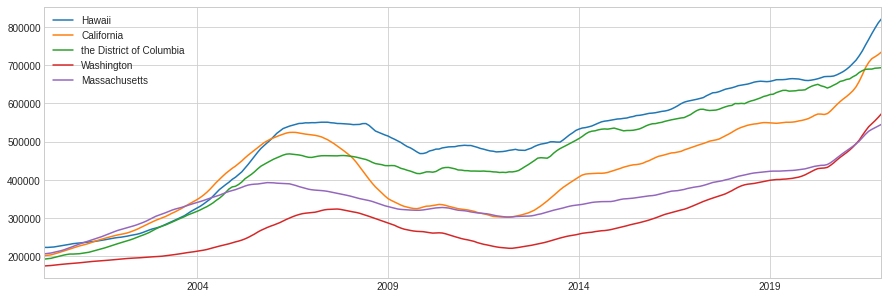

In [90]:
zstate[top5].plot(figsize=(15, 5))

<AxesSubplot:title={'center':'North Dakota House Prices'}>

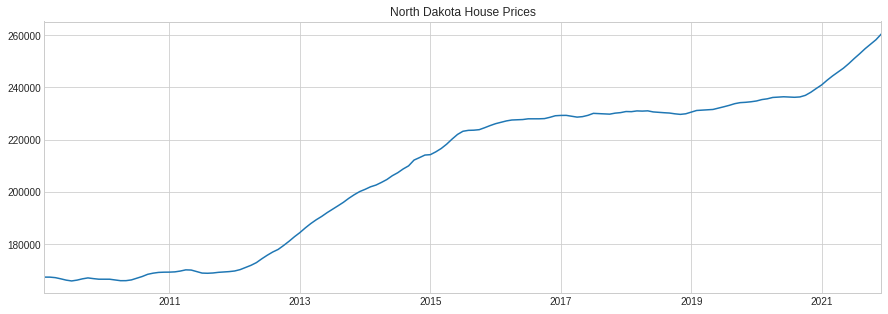

In [103]:
zstate.loc[zstate.index > "2009"]["North Dakota"].plot(
    figsize=(15, 5), title="North Dakota House Prices"
)

In [107]:
zstate_std = zstate / zstate.max()

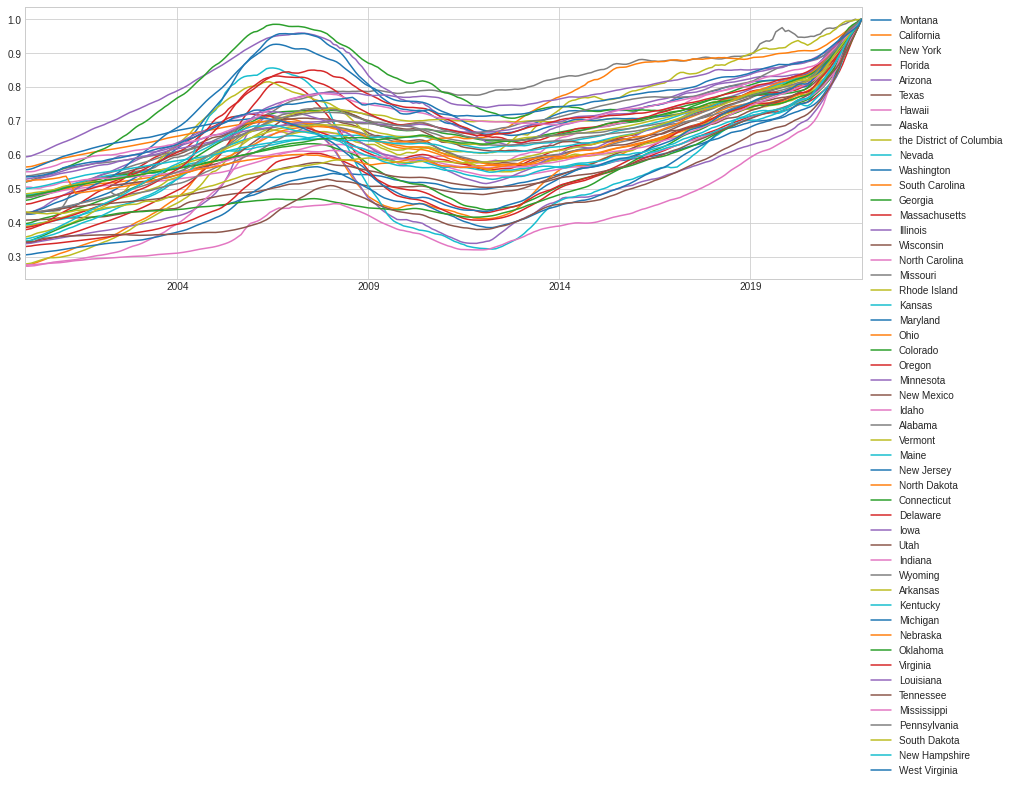

In [111]:
zstate_std.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

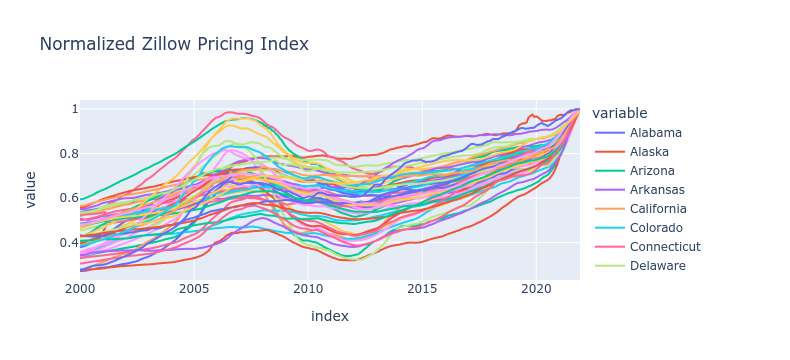

In [116]:
px.line(zstate_std.T.sort_index().T, title="Normalized Zillow Pricing Index")